In [1]:
import geopandas as gpd                        # data analysis and manipulation
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt  # interface to Open Access Hub
import os                                     # data access
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific comupting
import json                                   # JSON encoder and decoder
import glob                                   # data access
import time                                   # time assessment
import folium                                 # visualization
from folium import plugins                    # visualization
from datetime import date                     # dates, times and intervalls
#from osgeo import ogr, gdal, osr              # data conversion
from zipfile import ZipFile                   # file management
from scripts.download_imagery import DownloadImagery
from scripts.credential import username_landsat, password_landsat, username_sentinel, password_sentinel

<Axes: >

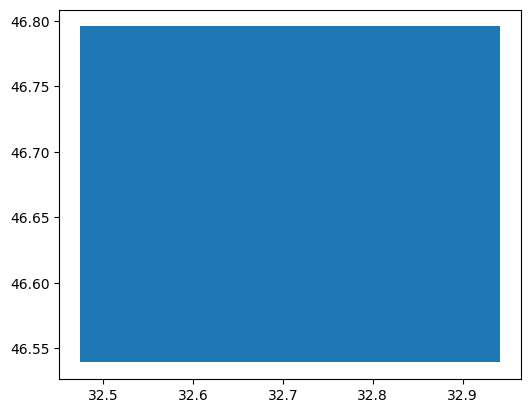

In [2]:
geom = gpd.read_file('../raw_data/flooded_areas.gpkg', layer = 'flooded_kherson')
geom.plot()

In [7]:
DownloadImagery.download_sentinel(username = username_sentinel,
                                  password = password_sentinel,
                                  boundary=geom,
                                  start_date= '20230520',
                                  end_date= '20230620',
                                  max_cloud_cover= 15)

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry,contains
04a3420b-ec7a-4906-b2bb-7b6b265bad2b,S2B_MSIL2A_20230603T084559_N0509_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-06-03T08:45:59.024Z, Instrument: MS...",false,2023-06-03 10:23:06,2023-06-03 08:45:59.024,2023-06-03 08:45:59.024,2023-06-03 13:43:33.314,...,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230603T102306_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230603T102306_A0325...,S2B_MSIL2A_20230603T084559_N0509_R107_T36TVS_2...,04a3420b-ec7a-4906-b2bb-7b6b265bad2b,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True
f6938ec2-4851-4a4b-ad8f-f8ec10edbcfd,S2A_MSIL2A_20230618T084601_N0509_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-06-18T08:46:01.024Z, Instrument: MS...",false,2023-06-18 15:16:02,2023-06-18 08:46:01.024,2023-06-18 08:46:01.024,2023-06-18 17:26:08.614,...,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230618T151602_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230618T151602_A0417...,S2A_MSIL2A_20230618T084601_N0509_R107_T36TVS_2...,f6938ec2-4851-4a4b-ad8f-f8ec10edbcfd,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True
